# Creating analytics tables with Pandas

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

import plotly.express as px
import matplotlib as plt

In [2]:
df = pd.read_csv('data/data.csv', encoding= 'cp1252' , header=0)

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [6]:
df['Quantity'].median()

3.0

In [7]:
df['UnitPrice'].median()

2.08

In [8]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
#test example by customer
df[df['CustomerID'] == 17850.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
86898,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom
86899,C543611,21874,GIN AND TONIC MUG,-1,2/10/2011 14:38,1.06,17850.0,United Kingdom
86900,C543611,71477,COLOUR GLASS. STAR T-LIGHT HOLDER,-2,2/10/2011 14:38,2.75,17850.0,United Kingdom
86901,C543611,82483,WOOD 2 DRAWER CABINET WHITE FINISH,-1,2/10/2011 14:38,4.95,17850.0,United Kingdom


### Prepare data for analysis

In [10]:
df.columns.str.lower()

Index(['invoiceno', 'stockcode', 'description', 'quantity', 'invoicedate',
       'unitprice', 'customerid', 'country'],
      dtype='object')

In [11]:
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unitprice', 'customer_id', 'country']

In [12]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [13]:
#count unique customers
len(df.customer_id.unique())

4373

In [14]:
len(df)/len(df.customer_id.unique())

123.9215641436085

In [15]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%m/%d/%Y %H:%M')

In [16]:
df.invoice_date.dt.date

0         2010-12-01
1         2010-12-01
2         2010-12-01
3         2010-12-01
4         2010-12-01
             ...    
541904    2011-12-09
541905    2011-12-09
541906    2011-12-09
541907    2011-12-09
541908    2011-12-09
Name: invoice_date, Length: 541909, dtype: object

In [17]:
df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unitprice              float64
customer_id            float64
country                 object
dtype: object

In [18]:
df.invoice_date.dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: invoice_date, Length: 541909, dtype: int64

In [19]:
df.invoice_date.dt.year.value_counts()

2011    499428
2010     42481
Name: invoice_date, dtype: int64

In [20]:
df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
249992,558991,21868,POTTING SHED TEA MUG,1,2011-07-05 11:32:00,1.25,14606.0,United Kingdom
161866,550493,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2011-04-18 14:50:00,0.42,15311.0,United Kingdom
108060,545475,22751,FELTCRAFT PRINCESS OLIVIA DOLL,96,2011-03-03 10:59:00,3.39,12415.0,Australia
417645,572668,21327,SKULLS WRITING SET,1,2011-10-25 13:07:00,1.65,18045.0,United Kingdom
529208,580730,23087,ZINC HEART T-LIGHT HOLDER,2,2011-12-05 17:28:00,2.46,NaN,United Kingdom


### From date to month

In [21]:
df['invoice_month'] = df['invoice_date'].to_numpy().astype('datetime64[M]')

In [22]:
df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month
308223,563943,21179,NO JUNK MAIL METAL SIGN,24,2011-08-22 10:04:00,0.39,13139.0,United Kingdom,2011-08-01
215054,555644,22791,T-LIGHT GLASS FLUTED ANTIQUE,12,2011-06-06 13:24:00,1.25,16520.0,United Kingdom,2011-06-01
87589,543660,21094,SET/6 RED SPOTTY PAPER PLATES,5,2011-02-11 10:40:00,0.83,NaN,United Kingdom,2011-02-01
94056,544323,16048,TEATIME ROUND PENCIL SHARPENER,1,2011-02-17 15:51:00,0.83,NaN,United Kingdom,2011-02-01
255807,559367,22182,CAKE STAND VICTORIAN FILIGREE SMALL,4,2011-07-08 09:38:00,4.95,13013.0,United Kingdom,2011-07-01


In [23]:
df.dtypes

invoice_no               object
stock_code               object
description              object
quantity                  int64
invoice_date     datetime64[ns]
unitprice               float64
customer_id             float64
country                  object
invoice_month    datetime64[ns]
dtype: object

### Сalculate total income

In [24]:
df['revenue'] = df['quantity']*df['unitprice']

In [25]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,2011-12-01,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,2011-12-01,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,2011-12-01,16.60


### Grouping df by month. Make the first pivot table

In [26]:
t = df.groupby(['invoice_month'])['revenue'].agg(['count','sum']).reset_index()

In [27]:
t.sort_values('invoice_month')

,invoice_month,count,sum
0,2010-12-01,42481,748957.020
1,2011-01-01,35147,560000.260
2,2011-02-01,27707,498062.650
3,2011-03-01,36748,683267.080
4,2011-04-01,29916,493207.121
5,2011-05-01,37030,723333.510
6,2011-06-01,36874,691123.120
7,2011-07-01,39518,681300.111
8,2011-08-01,35284,682680.510
9,2011-09-01,50226,1019687.622


### Check revenue after grouping


In [28]:
df['revenue'].sum()

9747747.933999998

In [29]:
t['sum'].sum()

9747747.933999998

In [30]:
t.set_index('invoice_month')

,count,sum
invoice_month,,
2010-12-01,42481,748957.020
2011-01-01,35147,560000.260
2011-02-01,27707,498062.650
2011-03-01,36748,683267.080
2011-04-01,29916,493207.121
2011-05-01,37030,723333.510
2011-06-01,36874,691123.120
2011-07-01,39518,681300.111
2011-08-01,35284,682680.510


In [31]:
fig = px.bar(t, x='invoice_month', y='sum', color='count')
fig.layout.xaxis.tickvals = t.invoice_month
fig.show()

### Checking the data

In [32]:
df['revenue'].sum()

9747747.933999998

In [33]:
t['sum'].sum()

9747747.933999998

### Make a range to be sure that all the dates are there


In [34]:
min_dt = df['invoice_month'].min()
min_dt

Timestamp('2010-12-01 00:00:00')

In [35]:
max_dt = df['invoice_month'].max()
max_dt

Timestamp('2011-12-01 00:00:00')

In [36]:
pd.date_range(min_dt, max_dt + pd.DateOffset(months=1), freq = 'MS') #specially added 1 month at the end

DatetimeIndex(['2010-12-01', '2011-01-01', '2011-02-01', '2011-03-01',
               '2011-04-01', '2011-05-01', '2011-06-01', '2011-07-01',
               '2011-08-01', '2011-09-01', '2011-10-01', '2011-11-01',
               '2011-12-01', '2012-01-01'],
              dtype='datetime64[ns]', freq='MS')

In [37]:
dt = pd.DataFrame(pd.date_range(min_dt, max_dt + pd.DateOffset(months=1), freq = 'MS'), \
                  columns=['months']) #specially added 1 month at the end

In [38]:
dt.head()

,months
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01


In [39]:
dt.columns = ['month']

### Create first analytical table

In [40]:
dt_analitics = dt.merge(t, how='left', left_on='month', right_on='invoice_month')

In [41]:
dt_analitics

,month,invoice_month,count,sum
0,2010-12-01,2010-12-01,42481.0,748957.020
1,2011-01-01,2011-01-01,35147.0,560000.260
2,2011-02-01,2011-02-01,27707.0,498062.650
3,2011-03-01,2011-03-01,36748.0,683267.080
4,2011-04-01,2011-04-01,29916.0,493207.121
5,2011-05-01,2011-05-01,37030.0,723333.510
6,2011-06-01,2011-06-01,36874.0,691123.120
7,2011-07-01,2011-07-01,39518.0,681300.111
8,2011-08-01,2011-08-01,35284.0,682680.510
9,2011-09-01,2011-09-01,50226.0,1019687.622


In [42]:
fig = px.bar(dt_analitics, x='invoice_month', y='sum', color='count')
fig.layout.xaxis.tickvals = t.invoice_month
fig.show()

## Create user tables

In [43]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [44]:
#get registration date - min date
users = df.groupby(['customer_id'])[['invoice_date','invoice_month']].min().reset_index()

In [45]:
users.head()

,customer_id,invoice_date,invoice_month
0,12346.0,2011-01-18 10:01:00,2011-01-01
1,12347.0,2010-12-07 14:57:00,2010-12-01
2,12348.0,2010-12-16 19:09:00,2010-12-01
3,12349.0,2011-11-21 09:51:00,2011-11-01
4,12350.0,2011-02-02 16:01:00,2011-02-01


In [46]:
users.columns

Index(['customer_id', 'invoice_date', 'invoice_month'], dtype='object')

In [47]:
#rename columns
users.columns = ['customer_id', 'reg_date', 'reg_month']

In [48]:
users.head()

,customer_id,reg_date,reg_month
0,12346.0,2011-01-18 10:01:00,2011-01-01
1,12347.0,2010-12-07 14:57:00,2010-12-01
2,12348.0,2010-12-16 19:09:00,2010-12-01
3,12349.0,2011-11-21 09:51:00,2011-11-01
4,12350.0,2011-02-02 16:01:00,2011-02-01


In [49]:
dt = pd.DataFrame(pd.date_range(min_dt, max_dt, freq = 'MS'), columns=['months'])

In [50]:
dt

,months
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


### Add an auxiliary key


In [51]:
dt['key'] = 1

In [52]:
dt

,months,key
0,2010-12-01,1
1,2011-01-01,1
2,2011-02-01,1
3,2011-03-01,1
4,2011-04-01,1
5,2011-05-01,1
6,2011-06-01,1
7,2011-07-01,1
8,2011-08-01,1
9,2011-09-01,1


In [53]:
users['key'] = 1

In [54]:
users.head()

,customer_id,reg_date,reg_month,key
0,12346.0,2011-01-18 10:01:00,2011-01-01,1
1,12347.0,2010-12-07 14:57:00,2010-12-01,1
2,12348.0,2010-12-16 19:09:00,2010-12-01,1
3,12349.0,2011-11-21 09:51:00,2011-11-01,1
4,12350.0,2011-02-02 16:01:00,2011-02-01,1


### Create template

In [55]:
template = dt.merge(users, on='key')

In [56]:
template.head()

,months,key,customer_id,reg_date,reg_month
0,2010-12-01,1,12346.0,2011-01-18 10:01:00,2011-01-01
1,2010-12-01,1,12347.0,2010-12-07 14:57:00,2010-12-01
2,2010-12-01,1,12348.0,2010-12-16 19:09:00,2010-12-01
3,2010-12-01,1,12349.0,2011-11-21 09:51:00,2011-11-01
4,2010-12-01,1,12350.0,2011-02-02 16:01:00,2011-02-01


In [57]:
template = dt.merge(users, on='key')[['months','customer_id','reg_date','reg_month']]

In [58]:
template

,months,customer_id,reg_date,reg_month
0,2010-12-01,12346.0,2011-01-18 10:01:00,2011-01-01
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01
3,2010-12-01,12349.0,2011-11-21 09:51:00,2011-11-01
4,2010-12-01,12350.0,2011-02-02 16:01:00,2011-02-01
...,...,...,...,...
56831,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01
56832,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01
56833,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01
56834,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01


In [59]:
#check merge
len(users) * len(dt)

56836

In [60]:
#remove unnecessary customer months before registration 
template = template[template.months >= template.reg_month]

In [61]:
template

,months,customer_id,reg_date,reg_month
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01
20,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01
26,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01
31,2010-12-01,12383.0,2010-12-22 14:28:00,2010-12-01
...,...,...,...,...
56831,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01
56832,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01
56833,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01
56834,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01


In [62]:
#check data by user 12346
template[template.customer_id == 12346.0]

,months,customer_id,reg_date,reg_month
4372,2011-01-01,12346.0,2011-01-18 10:01:00,2011-01-01
8744,2011-02-01,12346.0,2011-01-18 10:01:00,2011-01-01
13116,2011-03-01,12346.0,2011-01-18 10:01:00,2011-01-01
17488,2011-04-01,12346.0,2011-01-18 10:01:00,2011-01-01
21860,2011-05-01,12346.0,2011-01-18 10:01:00,2011-01-01
26232,2011-06-01,12346.0,2011-01-18 10:01:00,2011-01-01
30604,2011-07-01,12346.0,2011-01-18 10:01:00,2011-01-01
34976,2011-08-01,12346.0,2011-01-18 10:01:00,2011-01-01
39348,2011-09-01,12346.0,2011-01-18 10:01:00,2011-01-01
43720,2011-10-01,12346.0,2011-01-18 10:01:00,2011-01-01


In [63]:
#We created a very good template!

### Try to link revenue to our template

In [64]:
#aggregate per month
users_months = df.groupby(['customer_id','invoice_month'])['revenue'].sum().reset_index()

In [65]:
users_months

,customer_id,invoice_month,revenue
0,12346.0,2011-01-01,0.00
1,12347.0,2010-12-01,711.79
2,12347.0,2011-01-01,475.39
3,12347.0,2011-04-01,636.25
4,12347.0,2011-06-01,382.52
...,...,...,...
13670,18283.0,2011-10-01,114.65
13671,18283.0,2011-11-01,651.56
13672,18283.0,2011-12-01,208.00
13673,18287.0,2011-05-01,765.28


In [66]:
df[df['customer_id'] == 12346] #это возврат

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,2011-01-01,77183.6
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom,2011-01-01,-77183.6


In [67]:
users_months.columns

Index(['customer_id', 'invoice_month', 'revenue'], dtype='object')

In [68]:
users_months.columns = ['customer_id', 'month', 'revenue']

In [69]:
users_months

,customer_id,month,revenue
0,12346.0,2011-01-01,0.00
1,12347.0,2010-12-01,711.79
2,12347.0,2011-01-01,475.39
3,12347.0,2011-04-01,636.25
4,12347.0,2011-06-01,382.52
...,...,...,...
13670,18283.0,2011-10-01,114.65
13671,18283.0,2011-11-01,651.56
13672,18283.0,2011-12-01,208.00
13673,18287.0,2011-05-01,765.28


In [70]:
#check revenue sum
df.revenue.sum()

9747747.933999998

In [71]:
#check revenue sum
users_months.revenue.sum()

8300065.814

In [72]:
#found the cause of the problem
df.isna().mean()

invoice_no       0.000000
stock_code       0.000000
description      0.002683
quantity         0.000000
invoice_date     0.000000
unitprice        0.000000
customer_id      0.249267
country          0.000000
invoice_month    0.000000
revenue          0.000000
dtype: float64

In [73]:
df[df['customer_id'] < 0]

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue


In [74]:
#replace NaN with distinctive value
df['customer_id'] = df['customer_id'].fillna(-1)

In [75]:
#check
df[df['customer_id'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue


In [76]:
df[df['customer_id'] == -1]

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,-1.0,United Kingdom,2010-12-01,0.00
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,-1.0,United Kingdom,2010-12-01,2.51
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,-1.0,United Kingdom,2010-12-01,5.02
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,-1.0,United Kingdom,2010-12-01,3.40
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,-1.0,United Kingdom,2010-12-01,3.32
...,...,...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,-1.0,United Kingdom,2011-12-01,20.65
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,-1.0,United Kingdom,2011-12-01,16.52
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,-1.0,United Kingdom,2011-12-01,4.96
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,-1.0,United Kingdom,2011-12-01,10.79


# Пересоздадим таблицу users_months

In [77]:
#aggregate per month
users_months = df.groupby(['customer_id','invoice_month'])['revenue'].sum().reset_index()

In [78]:
users_months

,customer_id,invoice_month,revenue
0,-1.0,2010-12-01,194353.00
1,-1.0,2011-01-01,84925.88
2,-1.0,2011-02-01,61516.50
3,-1.0,2011-03-01,103302.47
4,-1.0,2011-04-01,67159.27
...,...,...,...
13683,18283.0,2011-10-01,114.65
13684,18283.0,2011-11-01,651.56
13685,18283.0,2011-12-01,208.00
13686,18287.0,2011-05-01,765.28


In [79]:
users_months.columns

Index(['customer_id', 'invoice_month', 'revenue'], dtype='object')

In [80]:
users_months.columns = ['customer_id', 'months', 'revenue']

In [81]:
#check revenue sum
df.revenue.sum()

9747747.933999998

In [82]:
#check revenue sum
users_months.revenue.sum()

9747747.934

In [83]:
#recreate users DataFrame and dt DataFrame
users = df.groupby(['customer_id'])[['invoice_date','invoice_month']].min().reset_index()
users.columns = ['customer_id', 'reg_date', 'reg_month']
users['key'] = 1
dt = pd.DataFrame(pd.date_range(min_dt, max_dt, freq = 'MS'), columns=['months'])
dt['key'] = 1
template = dt.merge(users, on='key')[['months','customer_id','reg_date','reg_month']]
#remove unnecessary customer months before registration 
template = template[template.months >= template.reg_month]

In [84]:
template

,months,customer_id,reg_date,reg_month
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01
2,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01
3,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01
21,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01
27,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01
...,...,...,...,...
56844,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01
56845,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01
56846,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01
56847,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01


In [85]:
#check data
template['customer_id'].nunique()

4373

In [86]:
df['customer_id'].nunique()

4373

In [87]:
df.revenue.sum()

9747747.933999998

In [88]:
users_months.revenue.sum()

9747747.934

### Linking revenue to our template and create Analitics table

In [89]:
# Create analytics table
at = template.merge(users_months, how='left', on=['customer_id','months'])

In [90]:
at.head()

,months,customer_id,reg_date,reg_month,revenue
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52


In [91]:
#check data
at.revenue.sum()

9747747.934

In [92]:
df.revenue.sum()

9747747.933999998

In [93]:
at[at['customer_id']==12346.0]

,months,customer_id,reg_date,reg_month,revenue
950,2011-01-01,12346.0,2011-01-18 10:01:00,2011-01-01,0.0
2320,2011-02-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
4070,2011-03-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
6260,2011-04-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
8749,2011-05-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
11517,2011-06-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
14520,2011-07-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
17714,2011-08-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
21075,2011-09-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN
24734,2011-10-01,12346.0,2011-01-18 10:01:00,2011-01-01,NaN


In [94]:
at[at['customer_id']==18282.0]

,months,customer_id,reg_date,reg_month,revenue
21071,2011-08-01,18282.0,2011-08-05 13:35:00,2011-08-01,98.76
24730,2011-09-01,18282.0,2011-08-05 13:35:00,2011-08-01,NaN
28741,2011-10-01,18282.0,2011-08-05 13:35:00,2011-08-01,NaN
33073,2011-11-01,18282.0,2011-08-05 13:35:00,2011-08-01,NaN
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84


# We create ANALITICS TABLE !!!

In [95]:
at

,months,customer_id,reg_date,reg_month,revenue
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52
...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00


# Сounting main metrics !


### Revenue per month

In [96]:
at.groupby(['months'])['revenue'].sum().reset_index().sort_values('months')

,months,revenue
0,2010-12-01,748957.020
1,2011-01-01,560000.260
2,2011-02-01,498062.650
3,2011-03-01,683267.080
4,2011-04-01,493207.121
5,2011-05-01,723333.510
6,2011-06-01,691123.120
7,2011-07-01,681300.111
8,2011-08-01,682680.510
9,2011-09-01,1019687.622


<Axes: xlabel='months'>

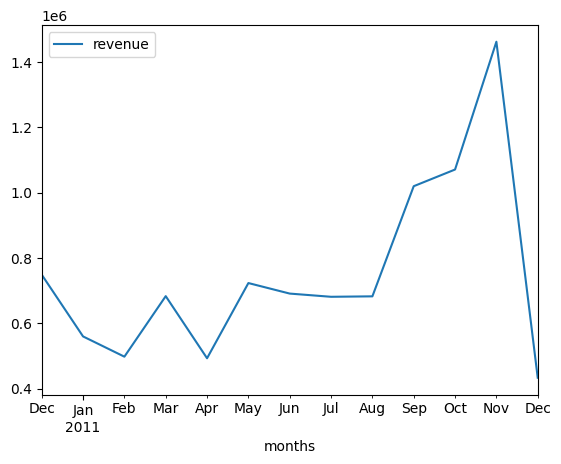

In [97]:
at.groupby(['months'])['revenue'].sum().reset_index().sort_values('months').set_index('months').plot()

In [98]:
#repeat fig
at_revenue = at.groupby(['months'])['revenue'].sum().reset_index().sort_values('months')
fig = px.bar(at_revenue, x='months', y='revenue')
fig.layout.xaxis.tickvals = at_revenue.months
fig.show()

### Users per month

In [99]:
at['user'] = 1

In [100]:
at

,months,customer_id,reg_date,reg_month,revenue,user
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00,1
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79,1
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80,1
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02,1
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52,1
...,...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN,1
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN,1
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84,1
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00,1


## Counting number of registered users

In [101]:
# Number of registered
at.groupby(['months'])[['user','revenue']].sum().reset_index().sort_values('months')

,months,user,revenue
0,2010-12-01,949,748957.020
1,2011-01-01,1370,560000.260
2,2011-02-01,1750,498062.650
3,2011-03-01,2190,683267.080
4,2011-04-01,2489,493207.121
5,2011-05-01,2768,723333.510
6,2011-06-01,3003,691123.120
7,2011-07-01,3194,681300.111
8,2011-08-01,3361,682680.510
9,2011-09-01,3659,1019687.622


## Mark active users who buy anything in month


In [102]:
# Mark active users who buy anything in month
~at['revenue'].isna()

0         True
1         True
2         True
3         True
4         True
         ...  
37444    False
37445    False
37446     True
37447     True
37448    False
Name: revenue, Length: 37449, dtype: bool

In [103]:
at['active'] = (~at['revenue'].isna())*1

In [104]:
at

,months,customer_id,reg_date,reg_month,revenue,user,active
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00,1,1
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79,1,1
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80,1,1
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02,1,1
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52,1,1
...,...,...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN,1,0
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN,1,0
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84,1,1
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00,1,1


In [105]:
# Number of registered and active customers
at.groupby(['months'])[['user','active','revenue']].sum().reset_index().sort_values('months')

,months,user,active,revenue
0,2010-12-01,949,949,748957.020
1,2011-01-01,1370,784,560000.260
2,2011-02-01,1750,799,498062.650
3,2011-03-01,2190,1021,683267.080
4,2011-04-01,2489,900,493207.121
5,2011-05-01,2768,1080,723333.510
6,2011-06-01,3003,1052,691123.120
7,2011-07-01,3194,994,681300.111
8,2011-08-01,3361,981,682680.510
9,2011-09-01,3659,1303,1019687.622


### Ho many new users come per month

In [106]:
# New users in this month months == reg_month
at['new_customer'] = (at['months'] == at['reg_month'])*1

In [107]:
at

,months,customer_id,reg_date,reg_month,revenue,user,active,new_customer
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00,1,1,1
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79,1,1,1
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80,1,1,1
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02,1,1,1
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52,1,1,1
...,...,...,...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN,1,0,0
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN,1,0,0
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84,1,1,0
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00,1,1,0


# Сreated a cool analytical table

In [108]:
# Number of registered, active customers and new_customers
at.groupby(['months']) \
[['user', 'active' , 'new_customer', 'revenue']] \
.sum().reset_index().sort_values('months')

,months,user,active,new_customer,revenue
0,2010-12-01,949,949,949,748957.020
1,2011-01-01,1370,784,421,560000.260
2,2011-02-01,1750,799,380,498062.650
3,2011-03-01,2190,1021,440,683267.080
4,2011-04-01,2489,900,299,493207.121
5,2011-05-01,2768,1080,279,723333.510
6,2011-06-01,3003,1052,235,691123.120
7,2011-07-01,3194,994,191,681300.111
8,2011-08-01,3361,981,167,682680.510
9,2011-09-01,3659,1303,298,1019687.622


## Add new indicators in analic table

### Average number of items purchased by active customers and mean unique products mean 

In [109]:
df.head()

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,invoice_month,revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,20.34


In [110]:
users_months = df.groupby(['customer_id','invoice_month']) \
    [['revenue','quantity', 'description']] \
    .agg({'revenue':'sum', 'quantity':'sum', 'description':'nunique'}) \
    .reset_index()

In [111]:
users_months.rename(columns = {'invoice_month':'months', 'description':'unique_products'}, inplace = True)

In [112]:
users_months

,customer_id,months,revenue,quantity,unique_products
0,-1.0,2010-12-01,194353.00,45866,2181
1,-1.0,2011-01-01,84925.88,39587,1925
2,-1.0,2011-02-01,61516.50,15156,1601
3,-1.0,2011-03-01,103302.47,7860,1789
4,-1.0,2011-04-01,67159.27,10513,1572
...,...,...,...,...,...
13683,18283.0,2011-10-01,114.65,63,38
13684,18283.0,2011-11-01,651.56,450,116
13685,18283.0,2011-12-01,208.00,142,50
13686,18287.0,2011-05-01,765.28,488,27


In [113]:
template

,months,customer_id,reg_date,reg_month
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01
2,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01
3,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01
21,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01
27,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01
...,...,...,...,...
56844,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01
56845,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01
56846,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01
56847,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01


In [114]:
users_months

,customer_id,months,revenue,quantity,unique_products
0,-1.0,2010-12-01,194353.00,45866,2181
1,-1.0,2011-01-01,84925.88,39587,1925
2,-1.0,2011-02-01,61516.50,15156,1601
3,-1.0,2011-03-01,103302.47,7860,1789
4,-1.0,2011-04-01,67159.27,10513,1572
...,...,...,...,...,...
13683,18283.0,2011-10-01,114.65,63,38
13684,18283.0,2011-11-01,651.56,450,116
13685,18283.0,2011-12-01,208.00,142,50
13686,18287.0,2011-05-01,765.28,488,27


In [115]:
# Create analytics table
at = template.merge(users_months, how='left', on=['customer_id','months'])

In [116]:
at

,months,customer_id,reg_date,reg_month,revenue,quantity,unique_products
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00,45866.0,2181.0
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79,319.0,31.0
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80,1254.0,13.0
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02,968.0,90.0
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52,604.0,43.0
...,...,...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN,NaN,NaN
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN,NaN,NaN
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84,28.0,5.0
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00,142.0,50.0


In [117]:
at['user'] = 1
at['active'] = (~at['revenue'].isna())*1
at['new_customer'] = (at['months'] == at['reg_month'])*1

In [118]:
at

,months,customer_id,reg_date,reg_month,revenue,quantity,unique_products,user,active,new_customer
0,2010-12-01,-1.0,2010-12-01 11:52:00,2010-12-01,194353.00,45866.0,2181.0,1,1,1
1,2010-12-01,12347.0,2010-12-07 14:57:00,2010-12-01,711.79,319.0,31.0,1,1,1
2,2010-12-01,12348.0,2010-12-16 19:09:00,2010-12-01,892.80,1254.0,13.0,1,1,1
3,2010-12-01,12370.0,2010-12-14 12:58:00,2010-12-01,1868.02,968.0,90.0,1,1,1
4,2010-12-01,12377.0,2010-12-20 09:37:00,2010-12-01,1001.52,604.0,43.0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
37444,2011-12-01,18280.0,2011-03-07 09:52:00,2011-03-01,NaN,NaN,NaN,1,0,0
37445,2011-12-01,18281.0,2011-06-12 10:53:00,2011-06-01,NaN,NaN,NaN,1,0,0
37446,2011-12-01,18282.0,2011-08-05 13:35:00,2011-08-01,77.84,28.0,5.0,1,1,0
37447,2011-12-01,18283.0,2011-01-06 14:14:00,2011-01-01,208.00,142.0,50.0,1,1,0


In [119]:
t_at = at.groupby(['months']) \
    [['user', 'active' , 'new_customer', 'revenue', 'quantity','unique_products']] \
    .agg({'user':'sum', 'active':'sum', 'new_customer':'sum', 'revenue':'sum', 'quantity':['sum'], 'unique_products': 'sum'}) \
    .reset_index() \
    .sort_values('months')

In [120]:
t_at.columns

MultiIndex([(         'months',    ''),
            (           'user', 'sum'),
            (         'active', 'sum'),
            (   'new_customer', 'sum'),
            (        'revenue', 'sum'),
            (       'quantity', 'sum'),
            ('unique_products', 'sum')],
           )

In [121]:
report = at.groupby(['months']) \
    [['user', 'active' , 'new_customer', 'revenue', 'quantity','unique_products']] \
    .agg({'user':'sum', 'active':'sum', 'new_customer':'sum', 'revenue':'sum', 'quantity':['sum','mean'], 'unique_products': 'mean'}) \
    .reset_index() \
    .sort_values('months')

In [122]:
report

months  user active new_customer      revenue  quantity              \
                sum    sum          sum          sum       sum        mean   
0  2010-12-01   949    949          949   748957.020  342228.0  360.619600   
1  2011-01-01  1370    784          421   560000.260  308966.0  394.089286   
2  2011-02-01  1750    799          380   498062.650  277989.0  347.921151   
3  2011-03-01  2190   1021          440   683267.080  351872.0  344.634672   
4  2011-04-01  2489    900          299   493207.121  289098.0  321.220000   
5  2011-05-01  2768   1080          279   723333.510  380391.0  352.213889   
6  2011-06-01  3003   1052          235   691123.120  341623.0  324.736692   
7  2011-07-01  3194    994          191   681300.111  391116.0  393.476861   
8  2011-08-01  3361    981          167   682680.510  406199.0  414.066259   
9  2011-09-01  3659   1303          298  1019687.622  549817.0  421.962394   
10 2011-10-01  4011   1426          352  1070704.670  570532.0  400.092567   
11 2011-11-01  4332   1712          321  1461756.250  740286.0  432.410047   
12 2011-12-01  4373    687           41   433668.010  226333.0  329.451237   

   unique_products  
              mean  
0        27.146470  
1        28.190051  
2        25.713392  
3        26.833497  
4        25.684444  
5        26.068519  
6        26.131179  
7        27.200201  
8        27.772681  
9        30.259401  
10       32.903927  
11       33.830023  
12       26.624454

In [123]:
report.columns

MultiIndex([(         'months',     ''),
            (           'user',  'sum'),
            (         'active',  'sum'),
            (   'new_customer',  'sum'),
            (        'revenue',  'sum'),
            (       'quantity',  'sum'),
            (       'quantity', 'mean'),
            ('unique_products', 'mean')],
           )

In [124]:
report.columns = ['_'.join(col).strip() for col in report.columns]

In [125]:
report

,months_,user_sum,active_sum,new_customer_sum,revenue_sum,quantity_sum,quantity_mean,unique_products_mean
0,2010-12-01,949,949,949,748957.020,342228.0,360.619600,27.146470
1,2011-01-01,1370,784,421,560000.260,308966.0,394.089286,28.190051
2,2011-02-01,1750,799,380,498062.650,277989.0,347.921151,25.713392
3,2011-03-01,2190,1021,440,683267.080,351872.0,344.634672,26.833497
4,2011-04-01,2489,900,299,493207.121,289098.0,321.220000,25.684444
5,2011-05-01,2768,1080,279,723333.510,380391.0,352.213889,26.068519
6,2011-06-01,3003,1052,235,691123.120,341623.0,324.736692,26.131179
7,2011-07-01,3194,994,191,681300.111,391116.0,393.476861,27.200201
8,2011-08-01,3361,981,167,682680.510,406199.0,414.066259,27.772681
9,2011-09-01,3659,1303,298,1019687.622,549817.0,421.962394,30.259401


In [126]:
й

NameError: name 'й' is not defined

# SQL

## Делаем аналитическую таблицу на sql

In [ ]:
import sqlalchemy as sq
from sqlalchemy.orm import Session
from sqlalchemy_utils import database_exists, create_database

In [ ]:
import csv
from io import StringIO

In [ ]:
engine = sq.create_engine('postgresql://jupyterdb_user:jupyterdb_user_123@db:5432/analytics_tables')
if not database_exists(engine.url):
    create_database(engine.url)

print(database_exists(engine.url), engine.url)

True postgresql://jupyterdb_user:jupyterdb_user_123@db:5432/analytics_tables


In [ ]:
insp = sq.inspect(engine)
schemas = insp.get_schema_names()
for schema in schemas:
    print("schema: ", schema)
    for table_name in insp.get_table_names(schema=schema):
        print("table_name: ",table_name)
        for column in insp.get_columns(table_name, schema=schema):
            print("Column: ", column)

schema:  information_schema
table_name:  sql_parts
Column:  {'name': 'feature_id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column:  {'name': 'feature_name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column:  {'name': 'is_supported', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column:  {'name': 'is_verified_by', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column:  {'name': 'comments', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
table_name:  sql_implementation_info
Column:  {'name': 'implementation_info_id', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment': None}
Column:  {'name': 'implementation_info_name', 'type': VARCHAR(), 'nullable': True, 'default': None, 'autoincrement': False, 'comment

In [ ]:
def select(sql: str, engine = engine) -> pd.DataFrame:
    with engine.connect() as connection:
        df_sql = pd.DataFrame(connection.execute(sq.text(sql)))
    return df_sql

In [ ]:
# from https://stackoverflow.com/questions/23103962/how-to-write-dataframe-to-postgres-table
#method for fast upload to postgresql

def psql_insert_copy(table, conn, keys, data_iter):
    # gets a DBAPI connection that can provide a cursor
    dbapi_conn = conn.connection
    with dbapi_conn.cursor() as cur:
        s_buf = StringIO()
        writer = csv.writer(s_buf)
        writer.writerows(data_iter)
        s_buf.seek(0)

        columns = ', '.join('"{}"'.format(k) for k in keys)
        if table.schema:
            table_name = '{}.{}'.format(table.schema, table.name)
        else:
            table_name = table.name

        sql = 'COPY {} ({}) FROM STDIN WITH CSV'.format(
            table_name, columns)
        cur.copy_expert(sql=sql, file=s_buf)

## Prepare Data from csv

In [ ]:
df = pd.read_csv('data/data.csv', encoding= 'cp1252' , header=0)

In [ ]:
df.columns = ['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unitprice', 'customer_id', 'country']

In [ ]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format = '%m/%d/%Y %H:%M')

In [ ]:
df.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unitprice              float64
customer_id            float64
country                 object
dtype: object

## Create table in postgres and upload data

In [ ]:
df.to_sql('ecommerce', 
          engine, index=False,
          if_exists='replace',
          method=psql_insert_copy)

In [ ]:
sql = ''' select * from ecommerce t limit 10 '''

In [ ]:
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


## Generate generate date range


In [ ]:
#cгенерируем диапазон дат
sql = ''' select * from ecommerce t
where t.invoice_date > '2010-12-01'
'''

In [ ]:
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
#Транкаем дату
#SELECT date_trunc('month', now());
sql = '''
select
date_trunc('month', now())
'''

In [ ]:
select(sql, engine)

,date_trunc
0,2022-12-01 00:00:00+00:00


In [ ]:
sql = '''
SELECT 
    now()::date AS "Current Date",
    date_trunc('month', now())::date AS "Start of Month";
'''

In [ ]:
select(sql, engine)

,Current Date,Start of Month
0,2022-12-26,2022-12-01


In [ ]:
#cгенерируем диапазон дат
sql = ''' select
t.invoice_date,
date_trunc('month', t.invoice_date) as month
 from ecommerce t
 limit 100
'''

In [ ]:
select(sql, engine)

,invoice_date,month
0,2010-12-01 08:26:00,2010-12-01
1,2010-12-01 08:26:00,2010-12-01
2,2010-12-01 08:26:00,2010-12-01
3,2010-12-01 08:26:00,2010-12-01
4,2010-12-01 08:26:00,2010-12-01
...,...,...
95,2010-12-01 09:37:00,2010-12-01
96,2010-12-01 09:37:00,2010-12-01
97,2010-12-01 09:37:00,2010-12-01
98,2010-12-01 09:37:00,2010-12-01


In [ ]:
#ищем минимальную и максимальную даты
sql = ''' select
min(date_trunc('month', t.invoice_date)),
max(date_trunc('month', t.invoice_date))
 from ecommerce t
 limit 100
'''

In [ ]:
select(sql, engine)

,min,max
0,2010-12-01,2011-12-01


In [ ]:
#Генерируем диапазон дат

In [ ]:
#ищем минимальную и максимальную даты
sql = ''' SELECT date_trunc('day', dd):: date
FROM generate_series
        ( '2007-02-01'::timestamp 
        , '2008-04-01'::timestamp
        , '1 day'::interval) dd
'''

In [ ]:
select(sql, engine)

,date_trunc
0,2007-02-01
1,2007-03-01
2,2007-04-01
3,2007-05-01
4,2007-06-01
5,2007-07-01
6,2007-08-01
7,2007-09-01
8,2007-10-01
9,2007-11-01


In [ ]:
#ищем минимальную и максимальную даты
sql = ''' select
min(date_trunc('month', t.invoice_date))
 from ecommerce t
 limit 100
'''
select(sql, engine)

In [ ]:
select(sql, engine)

,min
0,2010-12-01


In [ ]:
#генерируем от минимальной и до максимальной даты
sql = ''' SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
'''

In [ ]:
select(sql, engine)

,month
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


## Make user table

In [ ]:
sql = '''select
*
from ecommerce t
 limit 100
'''
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
95,536378,21559,STRAWBERRY LUNCH BOX WITH CUTLERY,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
96,536378,22352,LUNCH BOX WITH CUTLERY RETROSPOT,6,2010-12-01 09:37:00,2.55,14688.0,United Kingdom
97,536378,21212,PACK OF 72 RETROSPOT CAKE CASES,120,2010-12-01 09:37:00,0.42,14688.0,United Kingdom
98,536378,21975,PACK OF 60 DINOSAUR CAKE CASES,24,2010-12-01 09:37:00,0.55,14688.0,United Kingdom


### fill in the missing values ​​with the number 1


In [ ]:
sql = '''select
*
from ecommerce t
where customer_id is null
 limit 100
'''
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536414,22139,None,56,2010-12-01 11:52:00,0.00,None,United Kingdom
1,536982,20963,APPLE BATH SPONGE,4,2010-12-03 14:27:00,2.51,None,United Kingdom
2,537240,22740,POLKADOT PEN,1,2010-12-06 10:08:00,1.66,None,United Kingdom
3,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,None,United Kingdom
4,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,None,United Kingdom
...,...,...,...,...,...,...,...,...
95,536544,22198,LARGE POPCORN HOLDER,4,2010-12-01 14:32:00,3.36,None,United Kingdom
96,536544,22203,MILK PAN RED RETROSPOT,1,2010-12-01 14:32:00,7.62,None,United Kingdom
97,536544,22207,FRYING PAN UNION FLAG,1,2010-12-01 14:32:00,8.47,None,United Kingdom
98,536544,22219,LOVEBIRD HANGING DECORATION WHITE,3,2010-12-01 14:32:00,1.66,None,United Kingdom


In [ ]:
#536982
sql = '''select
t.*
from ecommerce t
where invoice_no = '536982'
 limit 100
'''
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,536982,20963,APPLE BATH SPONGE,4,2010-12-03 14:27:00,2.51,None,United Kingdom
1,536982,20676,RED RETROSPOT BOWL,1,2010-12-03 14:27:00,3.36,None,United Kingdom
2,536982,20711,JUMBO BAG TOYS,19,2010-12-03 14:27:00,4.21,None,United Kingdom
3,536982,20712,JUMBO BAG WOODLAND ANIMALS,10,2010-12-03 14:27:00,5.06,None,United Kingdom
4,536982,20717,STRAWBERRY SHOPPER BAG,3,2010-12-03 14:27:00,3.36,None,United Kingdom
...,...,...,...,...,...,...,...,...
95,536982,22652,TRAVEL SEWING KIT,8,2010-12-03 14:27:00,4.21,None,United Kingdom
96,536982,22654,DELUXE SEWING KIT,13,2010-12-03 14:27:00,12.72,None,United Kingdom
97,536982,22692,DOORMAT WELCOME TO OUR HOME,1,2010-12-03 14:27:00,16.98,None,United Kingdom
98,536982,22725,ALARM CLOCK BAKELIKE CHOCOLATE,1,2010-12-03 14:27:00,8.47,None,United Kingdom


In [ ]:
#заполняем пропуски в customer_id
sql = '''select
t.*,
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month
from ecommerce t
where customer_id is null
 limit 100
'''
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country,customer_id,month
0,536982,20963,APPLE BATH SPONGE,4,2010-12-03 14:27:00,2.51,None,United Kingdom,-1.0,2010-12-01
1,537240,22740,POLKADOT PEN,1,2010-12-06 10:08:00,1.66,None,United Kingdom,-1.0,2010-12-01
2,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,None,United Kingdom,-1.0,2010-12-01
3,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,None,United Kingdom,-1.0,2010-12-01
4,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,None,United Kingdom,-1.0,2010-12-01
...,...,...,...,...,...,...,...,...,...,...
95,536544,22203,MILK PAN RED RETROSPOT,1,2010-12-01 14:32:00,7.62,None,United Kingdom,-1.0,2010-12-01
96,536544,22207,FRYING PAN UNION FLAG,1,2010-12-01 14:32:00,8.47,None,United Kingdom,-1.0,2010-12-01
97,536544,22219,LOVEBIRD HANGING DECORATION WHITE,3,2010-12-01 14:32:00,1.66,None,United Kingdom,-1.0,2010-12-01
98,536544,22224,WHITE LOVEBIRD LANTERN,1,2010-12-01 14:32:00,5.91,None,United Kingdom,-1.0,2010-12-01


In [ ]:
#находим минимальный месяц на каждого пользователя
sql = '''select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end


limit 100
'''
select(sql, engine)

,customer_id,reg_month,reg_date
0,-1.0,2010-12-01,2010-12-01 11:52:00
1,12346.0,2011-01-01,2011-01-18 10:01:00
2,12347.0,2010-12-01,2010-12-07 14:57:00
3,12348.0,2010-12-01,2010-12-16 19:09:00
4,12349.0,2011-11-01,2011-11-21 09:51:00
...,...,...,...
95,12461.0,2011-07-01,2011-07-08 10:23:00
96,12462.0,2011-02-01,2011-02-09 14:44:00
97,12463.0,2011-04-01,2011-04-12 12:47:00
98,12464.0,2011-02-01,2011-02-03 13:30:00


### Делаем проверку

In [ ]:
#Делаем проверку
#находим минимальный месяц на каждого пользователя
sql = '''select
count(distinct case when t.customer_id is null then -1 else t.customer_id end)
from ecommerce t

limit 100
'''
select(sql, engine)

,count
0,4373


In [ ]:
#проверка проведена
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
)

select count(distinct t.customer_id) from users t
limit 5

'''
select(sql, engine)

,count
0,4373


## Cross join

In [ ]:
#проверка проведена
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),
dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
)

select * from dates t
limit 10

'''
select(sql, engine)

,month
0,2010-12-01
1,2011-01-01
2,2011-02-01
3,2011-03-01
4,2011-04-01
5,2011-05-01
6,2011-06-01
7,2011-07-01
8,2011-08-01
9,2011-09-01


In [ ]:
#делаем таблицу аналитическую
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),
dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
)

select t.month, u.* from dates t
join users u on 1=1
limit 10
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date
0,2010-12-01,-1.0,2010-12-01,2010-12-01 11:52:00
1,2011-01-01,-1.0,2010-12-01,2010-12-01 11:52:00
2,2011-02-01,-1.0,2010-12-01,2010-12-01 11:52:00
3,2011-03-01,-1.0,2010-12-01,2010-12-01 11:52:00
4,2011-04-01,-1.0,2010-12-01,2010-12-01 11:52:00
5,2011-05-01,-1.0,2010-12-01,2010-12-01 11:52:00
6,2011-06-01,-1.0,2010-12-01,2010-12-01 11:52:00
7,2011-07-01,-1.0,2010-12-01,2010-12-01 11:52:00
8,2011-08-01,-1.0,2010-12-01,2010-12-01 11:52:00
9,2011-09-01,-1.0,2010-12-01,2010-12-01 11:52:00


In [ ]:
#проверяем таблицу по пользователю 12648
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),
dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
)

select t.month, u.* from dates t
join users u on 1=1
where u.customer_id = '12648'
limit 10
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date
0,2010-12-01,12648.0,2011-07-01,2011-07-08 11:55:00
1,2011-01-01,12648.0,2011-07-01,2011-07-08 11:55:00
2,2011-02-01,12648.0,2011-07-01,2011-07-08 11:55:00
3,2011-03-01,12648.0,2011-07-01,2011-07-08 11:55:00
4,2011-04-01,12648.0,2011-07-01,2011-07-08 11:55:00
5,2011-05-01,12648.0,2011-07-01,2011-07-08 11:55:00
6,2011-06-01,12648.0,2011-07-01,2011-07-08 11:55:00
7,2011-07-01,12648.0,2011-07-01,2011-07-08 11:55:00
8,2011-08-01,12648.0,2011-07-01,2011-07-08 11:55:00
9,2011-09-01,12648.0,2011-07-01,2011-07-08 11:55:00


## Делаем templete (заготовку)

In [ ]:
# Делаем templete
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),
dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),
templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
)

select * from templete t
where t.customer_id = '12648'
limit 100
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date
0,2011-07-01,12648.0,2011-07-01,2011-07-08 11:55:00
1,2011-08-01,12648.0,2011-07-01,2011-07-08 11:55:00
2,2011-09-01,12648.0,2011-07-01,2011-07-08 11:55:00
3,2011-10-01,12648.0,2011-07-01,2011-07-08 11:55:00
4,2011-11-01,12648.0,2011-07-01,2011-07-08 11:55:00
5,2011-12-01,12648.0,2011-07-01,2011-07-08 11:55:00


## Аггрегируем данные по выручке

In [ ]:
# Делаем templete
sql = '''
select * from ecommerce t
where t.customer_id = '12648'
limit 100
'''
select(sql, engine)

,invoice_no,stock_code,description,quantity,invoice_date,unitprice,customer_id,country
0,559421,22962,JAM JAR WITH PINK LID,12,2011-07-08 11:55:00,0.85,12648.0,Germany
1,559421,47590B,PINK HAPPY BIRTHDAY BUNTING,3,2011-07-08 11:55:00,5.45,12648.0,Germany
2,559421,47590A,BLUE HAPPY BIRTHDAY BUNTING,3,2011-07-08 11:55:00,5.45,12648.0,Germany
3,559421,20674,GREEN POLKADOT BOWL,8,2011-07-08 11:55:00,1.25,12648.0,Germany
4,559421,20675,BLUE POLKADOT BOWL,8,2011-07-08 11:55:00,1.25,12648.0,Germany
5,559421,20677,PINK POLKADOT BOWL,8,2011-07-08 11:55:00,1.25,12648.0,Germany
6,559421,21239,PINK POLKADOT CUP,8,2011-07-08 11:55:00,0.85,12648.0,Germany
7,559421,21240,BLUE POLKADOT CUP,8,2011-07-08 11:55:00,0.85,12648.0,Germany
8,559421,21245,GREEN POLKADOT PLATE,8,2011-07-08 11:55:00,1.69,12648.0,Germany
9,559421,21244,BLUE POLKADOT PLATE,16,2011-07-08 11:55:00,1.69,12648.0,Germany


In [ ]:
sql = '''
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue


from ecommerce t
where t.customer_id = '12648'

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)

'''
select(sql, engine)

,customer_id,month,revenue
0,12648.0,2011-07-01,318.05


In [ ]:
sql = '''
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)

'''
select(sql, engine)

,customer_id,month,revenue
0,-1.000,2010-12-01,194353.000
1,-1.000,2011-01-01,84925.880
2,-1.000,2011-02-01,61516.500
3,-1.000,2011-03-01,103302.470
4,-1.000,2011-04-01,67159.270
...,...,...,...
13683,18283.000,2011-10-01,114.650
13684,18283.000,2011-11-01,651.560
13685,18283.000,2011-12-01,208.000
13686,18287.000,2011-05-01,765.280


In [ ]:
#проверяем по контрольным суммам
sql = '''
select
sum(t.quantity * t.unitprice) as revenue
from ecommerce t
'''
select(sql, engine)

,revenue
0,9747747.934


In [ ]:
sql = '''
with user_month as (
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
)
select sum(t.revenue) from user_month t
'''
select(sql, engine)

,sum
0,9747747.934


In [ ]:
#Суммы сходятся

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [ ]:
#Джоиним user_month и получаем аналитическую таблицу
# Делаем templete
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
)

select * from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
where t.customer_id = '12648'
order by t.month
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date,customer_id,month,revenue
0,2011-07-01,12648.000,2011-07-01,2011-07-08 11:55:00,12648.000,2011-07-01,318.050
1,2011-08-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN
2,2011-09-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN
3,2011-10-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN
4,2011-11-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN
5,2011-12-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN


## В SQL легче добавить т.к. все собрано в одном месте

### Добавим общее количество

In [ ]:
#Джоиним user_month и получаем аналитическую таблицу
# Делаем templete
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum


from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
)

select * from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
where t.customer_id = '12648'
order by t.month
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date,customer_id,month,revenue_sum,quantity_sum
0,2011-07-01,12648.000,2011-07-01,2011-07-08 11:55:00,12648.000,2011-07-01,318.050,160
1,2011-08-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN,None
2,2011-09-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN,None
3,2011-10-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN,None
4,2011-11-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN,None
5,2011-12-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,NaT,NaN,None


### !!! В названия удобнее добавлять префиксы sum и указываем нужные столбцы

In [ ]:
#Джоиним user_month и получаем аналитическую таблицу
# Делаем templete
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum


from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
)

select t.*, u.revenue_sum, u.quantity_sum from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
where t.customer_id = '12648'
order by t.month
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date,revenue_sum,quantity_sum
0,2011-07-01,12648.000,2011-07-01,2011-07-08 11:55:00,318.050,160
1,2011-08-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None
2,2011-09-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None
3,2011-10-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None
4,2011-11-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None
5,2011-12-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None


In [ ]:
#добавляю уникальные продукты
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum,
count(distinct t.description) as description_cnt_distinct

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
)

select t.*,
u.revenue_sum,
u.quantity_sum,
u.description_cnt_distinct,
1 as user,
case when u.revenue_sum is not null then 1 else 0 end as active,
case when t.month = t.reg_month then 1 else 0 end as new


from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
where t.customer_id = '12648'
order by t.month
'''
select(sql, engine)

,month,customer_id,reg_month,reg_date,revenue_sum,quantity_sum,description_cnt_distinct,user,active,new
0,2011-07-01,12648.000,2011-07-01,2011-07-08 11:55:00,318.050,160,21.000,1,1,1
1,2011-08-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None,NaN,1,0,0
2,2011-09-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None,NaN,1,0,0
3,2011-10-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None,NaN,1,0,0
4,2011-11-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None,NaN,1,0,0
5,2011-12-01,12648.000,2011-07-01,2011-07-08 11:55:00,NaN,None,NaN,1,0,0


## Создаем ежемесячный отчет

In [ ]:
#добавляю уникальные продукты
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum,
count(distinct t.description) as description_cnt_distinct

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
),

analytical_table as 
(
select t.*,
u.revenue_sum,
u.quantity_sum,
u.description_cnt_distinct,
1 as user,
case when u.revenue_sum is not null then 1 else 0 end as active,
case when t.month = t.reg_month then 1 else 0 end as new


from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
)

select
t.month,
sum(t.user) as user,
sum(t.active) as active,
avg(t.active) as active_pct,
sum(t.new) as new,
sum(t.revenue_sum) as revenue



from analytical_table t
group by t.month
order by t.month

'''
select(sql, engine)

,month,user,active,active_pct,new,revenue
0,2010-12-01,949,949,1.00000000000000000000,949,748957.020
1,2011-01-01,1370,784,0.57226277372262773723,421,560000.260
2,2011-02-01,1750,799,0.45657142857142857143,380,498062.650
3,2011-03-01,2190,1021,0.46621004566210045662,440,683267.080
4,2011-04-01,2489,900,0.36159100040176777822,299,493207.121
5,2011-05-01,2768,1080,0.39017341040462427746,279,723333.510
6,2011-06-01,3003,1052,0.35031635031635031635,235,691123.120
7,2011-07-01,3194,994,0.31120851596743894803,191,681300.111
8,2011-08-01,3361,981,0.29187741743528711693,167,682680.510
9,2011-09-01,3659,1303,0.35610822629133643072,298,1019687.622


### Делаем проверку сумм


In [ ]:
#делаем проверку суммы
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum,
count(distinct t.description) as description_cnt_distinct

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
),

analytical_table as 
(
select t.*,
u.revenue_sum,
u.quantity_sum,
u.description_cnt_distinct,
1 as user,
case when u.revenue_sum is not null then 1 else 0 end as active,
case when t.month = t.reg_month then 1 else 0 end as new


from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
)

select
t.month,
sum(t.user) as user,
sum(t.active) as active_sum,
avg(t.active) as active_pct_sum,
sum(t.new) as new_sum,
sum(t.revenue_sum) as revenue_sun,
avg(t.revenue_sum) as quantity_avg,
avg(t.description_cnt_distinct) as description_cnt_distinct_avg



from analytical_table t
group by t.month
order by t.month

'''
select(sql, engine)

,month,user,active_sum,active_pct_sum,new_sum,revenue_sun,quantity_avg,description_cnt_distinct_avg
0,2010-12-01,949,949,1.00000000000000000000,949,748957.020,789.207,27.1464699683877766
1,2011-01-01,1370,784,0.57226277372262773723,421,560000.260,714.286,28.1900510204081633
2,2011-02-01,1750,799,0.45657142857142857143,380,498062.650,623.358,25.7133917396745932
3,2011-03-01,2190,1021,0.46621004566210045662,440,683267.080,669.214,26.8334965719882468
4,2011-04-01,2489,900,0.36159100040176777822,299,493207.121,548.008,25.6844444444444444
5,2011-05-01,2768,1080,0.39017341040462427746,279,723333.510,669.753,26.0685185185185185
6,2011-06-01,3003,1052,0.35031635031635031635,235,691123.120,656.961,26.1311787072243346
7,2011-07-01,3194,994,0.31120851596743894803,191,681300.111,685.413,27.2002012072434608
8,2011-08-01,3361,981,0.29187741743528711693,167,682680.510,695.903,27.7726809378185525
9,2011-09-01,3659,1303,0.35610822629133643072,298,1019687.622,782.569,30.2594013814274751


In [ ]:
t_1 = select(sql, engine)

In [ ]:
t_1['revenue'].sum()

9747747.934000008

In [ ]:
sql = '''
select
sum(t.quantity * t.unitprice) as revenue_sum

from ecommerce t
'''
select(sql, engine)

,revenue_sum
0,9747747.934


# Финальный отчет

In [ ]:
#делаем проверку суммы
sql = '''
with users as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
min(date_trunc('month', t.invoice_date)) as reg_month,
min(t.invoice_date) as reg_date

from ecommerce t
group by
case when t.customer_id is null then -1 else t.customer_id end
),

dates as
(
SELECT date_trunc('day', dd):: date as month
FROM generate_series
        ((select min(date_trunc('month', t.invoice_date)) from ecommerce t)
        ,(select max(date_trunc('month', t.invoice_date)) from ecommerce t)
        , '1 month'::interval) dd
),

templete as
(
select t.month, u.* from dates t
join users u on 1=1 and t.month >= u.reg_month
),

user_month as 
(
select
case when t.customer_id is null then -1 else t.customer_id end as customer_id,
date_trunc('month', t.invoice_date) as month,
sum(t.quantity * t.unitprice) as revenue_sum,
sum(t.quantity) as quantity_sum,
count(distinct t.description) as description_cnt_distinct

from ecommerce t

group by
case when t.customer_id is null then -1 else t.customer_id end,
date_trunc('month', t.invoice_date)
),

analytical_table as 
(
select t.*,
u.revenue_sum,
u.quantity_sum,
u.description_cnt_distinct,
1 as user,
case when u.revenue_sum is not null then 1 else 0 end as active,
case when t.month = t.reg_month then 1 else 0 end as new


from templete t
left join user_month u on t.customer_id = u.customer_id and t.month = u.month
)

select
t.month,
sum(t.user) as user,
sum(t.active) as active_sum,
avg(t.active) as active_pct_sum,
sum(t.new) as new_sum,
sum(t.revenue_sum) as revenue_sun,
avg(t.revenue_sum) as quantity_avg,
avg(t.description_cnt_distinct) as description_cnt_distinct_avg



from analytical_table t
group by t.month
order by t.month

'''
select(sql, engine)

,month,user,active_sum,active_pct_sum,new_sum,revenue_sun,quantity_avg,description_cnt_distinct_avg
0,2010-12-01,949,949,1.00000000000000000000,949,748957.020,789.207,27.1464699683877766
1,2011-01-01,1370,784,0.57226277372262773723,421,560000.260,714.286,28.1900510204081633
2,2011-02-01,1750,799,0.45657142857142857143,380,498062.650,623.358,25.7133917396745932
3,2011-03-01,2190,1021,0.46621004566210045662,440,683267.080,669.214,26.8334965719882468
4,2011-04-01,2489,900,0.36159100040176777822,299,493207.121,548.008,25.6844444444444444
5,2011-05-01,2768,1080,0.39017341040462427746,279,723333.510,669.753,26.0685185185185185
6,2011-06-01,3003,1052,0.35031635031635031635,235,691123.120,656.961,26.1311787072243346
7,2011-07-01,3194,994,0.31120851596743894803,191,681300.111,685.413,27.2002012072434608
8,2011-08-01,3361,981,0.29187741743528711693,167,682680.510,695.903,27.7726809378185525
9,2011-09-01,3659,1303,0.35610822629133643072,298,1019687.622,782.569,30.2594013814274751
